<a href="https://colab.research.google.com/github/dharmendra7/predict_the_co2_emission/blob/main/MLR_co2emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
import requests
response = requests.get(path)
if response.status_code == 200:
    with open("FuelConsumption.csv", "wb") as f:
      f.write(response.content)
else:
    print('request is not working')

In [5]:
df = pd.read_csv('/content/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
x = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = df[['CO2EMISSIONS']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,  Y_train, Y_test = train_test_split(x, y,test_size=0.2, random_state=0)


In [17]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

print(y, Y_pred)

      CO2EMISSIONS
0              196
1              221
2              136
3              255
4              244
...            ...
1062           271
1063           264
1064           271
1065           260
1066           294

[1067 rows x 1 columns] [[334.65227307]
 [209.78816154]
 [217.87642537]
 [229.37322867]
 [194.81062694]
 [296.29986196]
 [210.68685752]
 [265.32765366]
 [207.09207359]
 [319.67034797]
 [279.70678935]
 [381.69354216]
 [224.88194401]
 [291.80638206]
 [185.21648722]
 [278.922146  ]
 [348.72672119]
 [205.58839296]
 [254.24300481]
 [378.91867664]
 [195.40463534]
 [229.97821332]
 [251.54691687]
 [217.57393304]
 [180.43149124]
 [260.82978325]
 [266.82694379]
 [358.3164704 ]
 [291.51486598]
 [166.34826212]
 [336.74996211]
 [222.67020235]
 [284.79866816]
 [242.85586363]
 [195.40463534]
 [194.80404119]
 [312.7854677 ]
 [214.28164144]
 [224.16949248]
 [250.04982198]
 [192.7085474 ]
 [192.7085474 ]
 [207.09207359]
 [187.91696567]
 [311.28617756]
 [200.4987094 ]
 [229.55947

In [18]:
from sklearn.metrics import r2_score
print('r2 score : ', r2_score(Y_test, Y_pred))


r2 score :  0.8604199405627129


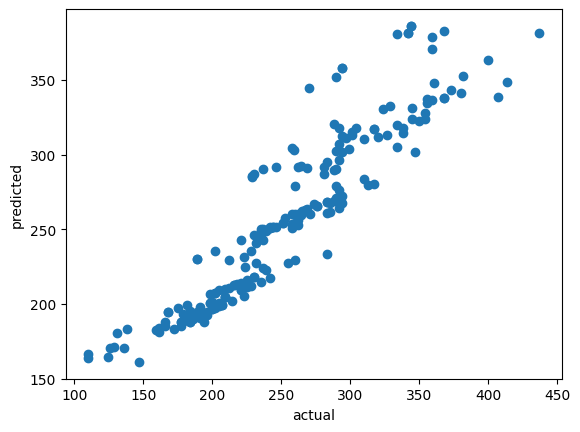

In [15]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()